In [1]:
import os, sys
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras import optimizers

In [2]:
# 分類するクラス
classes = ['Field', 'Undiscovered', 'Bug', 'Amorphous', 'Dragon', 'Fairy', 'Mineral', 
           'Flying', 'Grass', 'Human-Like', 'Monster', 'Water']


nb_classes = len(classes)

img_width, img_height = 150, 150

In [3]:
result_dir = 'results'

test_data_dir = './AllDataSet/test'

In [4]:
def model_load():
    # VGG16, FC層は不要なので include_top=False
    input_tensor = Input(shape=(img_width, img_height, 3))
    vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

    # FC層の作成
    top_model = Sequential()
    top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(nb_classes, activation='softmax'))

    # VGG16とFC層を結合してモデルを作成
    model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

    # 学習済みの重みをロード
    model.load_weights(os.path.join(result_dir, 'finetuning-3.h5'))

    # 多クラス分類を指定
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

    return model

In [5]:
import pandas as pd
csvPath = './PokemonDataCSV/'
csvName = 'pokedex_(Update_05.20).csv'
pokedex = pd.read_csv(csvPath+csvName)
pokedex = pokedex.drop(['Unnamed: 0'], axis=1)
# pokedex.info()

In [6]:
#使用するデータのみで表を作る
pokedex = pokedex[ ['pokedex_number', 'name', 'japanese_name', 'type_number', 'type_1', 'type_2',
                   'egg_type_number', 'egg_type_1', 'egg_type_2'] ]
# pokedex.info()

In [7]:
import os
from os import listdir
# 画像ファイルの読み込み
imageDir = "./AllDataSet/test"
# .DS_Storeの削除
fltr_list = [filename for filename in listdir(imageDir) if not filename.startswith('.')]
fileNameLists = []
fileNumberLists = []
for filename in fltr_list:
    fileNameLists.append(filename)
    fileNumber = filename.split('.')[0]
#     if fileNumber == '':
#         continue
    fileNumber = int(fileNumber)
    fileNumberLists.append(fileNumber)

pokedex2 = pd.DataFrame( [fileNumberLists, fileNameLists], index=['pokedex_number', 'image_name'] )
pokedex2 = pokedex2.T

In [8]:
pokedex3 = pd.merge(pokedex, pokedex2, on='pokedex_number', how='inner' )

# egg_type_1が欠損値の行を削除（主にメガ進化ポケモン）
pokedex3 = pokedex3.dropna(subset=['egg_type_1'])
# pokedex_numberが重複している行を削除（主にメガ進化ポケモン）
pokedex3 = pokedex3.drop_duplicates(subset=['pokedex_number'])

In [9]:
pokedex3.fillna('str')

,pokedex_number,name,japanese_name,type_number,type_1,type_2,egg_type_number,egg_type_1,egg_type_2,image_name
0,810,Grookey,str,1,Grass,str,2,Field,Grass,810.png
1,811,Thwackey,str,1,Grass,str,2,Field,Grass,811.png
2,812,Rillaboom,str,1,Grass,str,2,Field,Grass,812.png
3,813,Scorbunny,str,1,Fire,str,2,Field,Human-Like,813.png
4,814,Raboot,str,1,Fire,str,2,Field,Human-Like,814.png
...,...,...,...,...,...,...,...,...,...,...
80,886,Drakloak,str,2,Dragon,Ghost,2,Amorphous,Dragon,886.png
81,887,Dragapult,str,2,Dragon,Ghost,2,Amorphous,Dragon,887.png
82,888,Zacian Crowned Sword,str,2,Fairy,Steel,1,Undiscovered,str,888.png
84,889,Zamazenta Crowned Shield,str,2,Fighting,Steel,1,Undiscovered,str,889.png


[27    Mineral
Name: egg_type_1, dtype: object, 27    NaN
Name: egg_type_2, dtype: object]
[('Mineral', 0.99999976), ('Amorphous', 2.6262504e-07)]


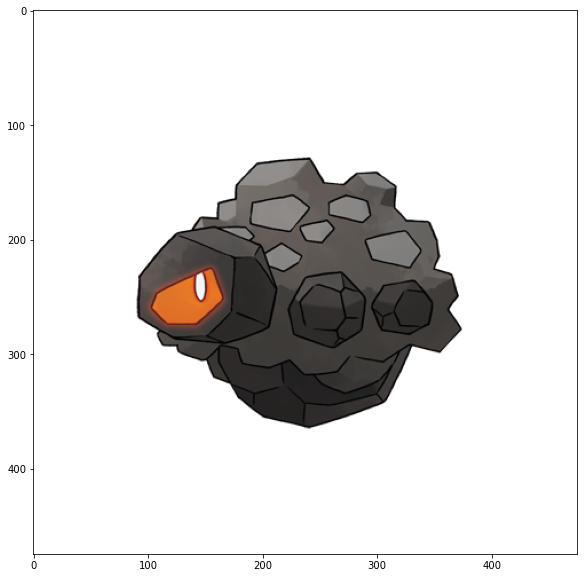

[13    Flying
Name: egg_type_1, dtype: object, 13    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.56824785), ('Flying', 0.13821822)]


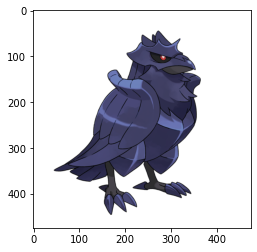

[12    Flying
Name: egg_type_1, dtype: object, 12    NaN
Name: egg_type_2, dtype: object]
[('Flying', 0.9507791), ('Field', 0.035820838)]


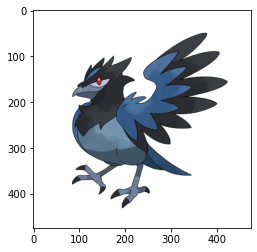

[26    Field
Name: egg_type_1, dtype: object, 26    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.99866474), ('Water', 0.00065166433)]


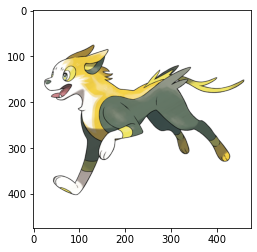

[10    Field
Name: egg_type_1, dtype: object, 10    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.99286735), ('Fairy', 0.0069545317)]


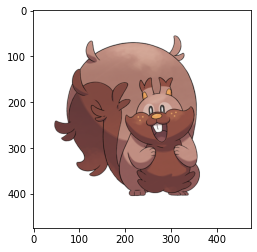

[24    Monster
Name: egg_type_1, dtype: object, 24    Water 1
Name: egg_type_2, dtype: object]
[('Water', 0.59572595), ('Fairy', 0.23002331)]


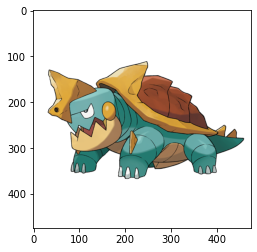

[25    Field
Name: egg_type_1, dtype: object, 25    NaN
Name: egg_type_2, dtype: object]
[('Monster', 0.5369279), ('Field', 0.22491354)]


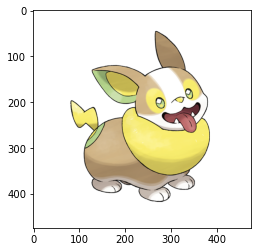

[11    Flying
Name: egg_type_1, dtype: object, 11    NaN
Name: egg_type_2, dtype: object]
[('Flying', 0.9967721), ('Water', 0.0015876633)]


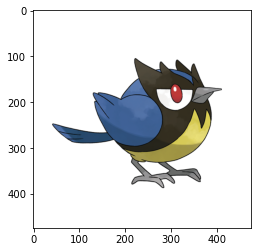

[9    Field
Name: egg_type_1, dtype: object, 9    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.7369922), ('Flying', 0.2282784)]


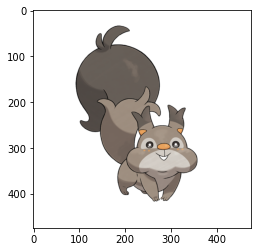

[15    Bug
Name: egg_type_1, dtype: object, 15    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.9999169), ('Undiscovered', 8.1380545e-05)]


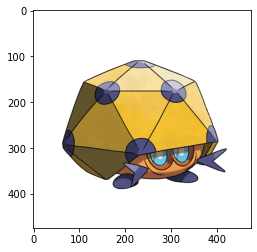

[21    Field
Name: egg_type_1, dtype: object, 21    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.9718186), ('Flying', 0.017211955)]


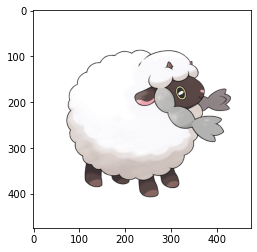

[20    Grass
Name: egg_type_1, dtype: object, 20    NaN
Name: egg_type_2, dtype: object]
[('Fairy', 0.6301822), ('Field', 0.14768115)]


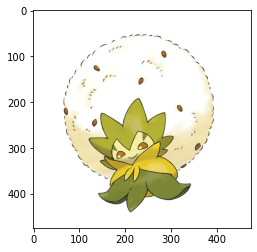

[14    Bug
Name: egg_type_1, dtype: object, 14    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.48232895), ('Undiscovered', 0.41110072)]


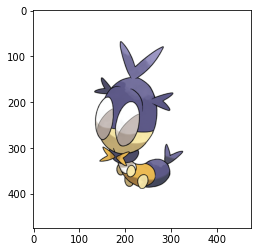

[8    Field
Name: egg_type_1, dtype: object, 8    Water 1
Name: egg_type_2, dtype: object]
[('Water', 0.80262846), ('Dragon', 0.17468792)]


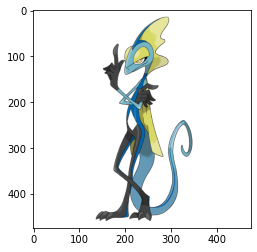

[22    Field
Name: egg_type_1, dtype: object, 22    NaN
Name: egg_type_2, dtype: object]
[('Flying', 0.9900377), ('Field', 0.0099365385)]


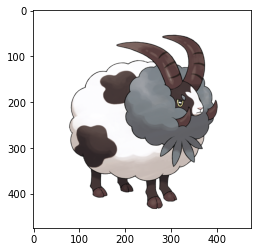

[16    Bug
Name: egg_type_1, dtype: object, 16    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.9966324), ('Field', 0.0016127086)]


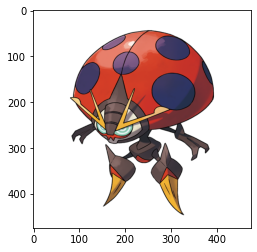

[17    Field
Name: egg_type_1, dtype: object, 17    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.9857604), ('Dragon', 0.013022291)]


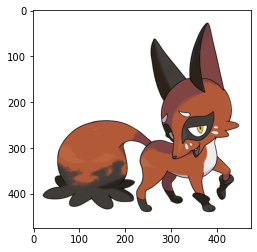

[23    Monster
Name: egg_type_1, dtype: object, 23    Water 1
Name: egg_type_2, dtype: object]
[('Monster', 0.46178734), ('Undiscovered', 0.44678727)]


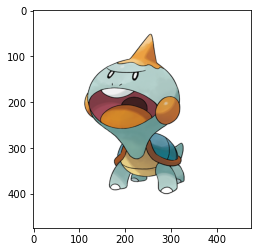

[77    Undiscovered
Name: egg_type_1, dtype: object, 77    NaN
Name: egg_type_2, dtype: object]
[('Water', 0.48466247), ('Bug', 0.46147996)]


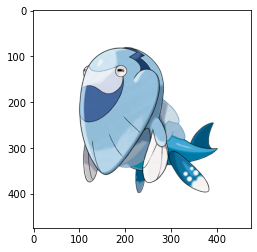

[45    Amorphous
Name: egg_type_1, dtype: object, 45    Mineral
Name: egg_type_2, dtype: object]
[('Water', 0.6308324), ('Undiscovered', 0.28047958)]


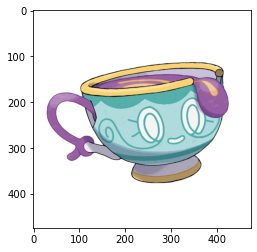

[30    Dragon
Name: egg_type_1, dtype: object, 30    Grass
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.44597653), ('Amorphous', 0.17849569)]


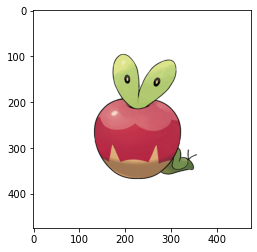

[59    Amorphous
Name: egg_type_1, dtype: object, 59    Fairy
Name: egg_type_2, dtype: object]
[('Field', 0.5664199), ('Water', 0.39416203)]


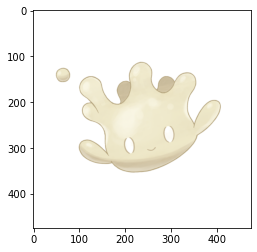

[60    Amorphous
Name: egg_type_1, dtype: object, 60    Fairy
Name: egg_type_2, dtype: object]
[('Amorphous', 0.94972354), ('Monster', 0.025235875)]


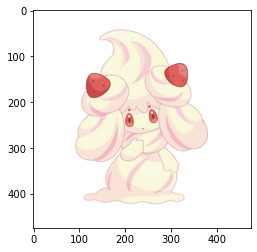

[31    Dragon
Name: egg_type_1, dtype: object, 31    Grass
Name: egg_type_2, dtype: object]
[('Field', 0.731737), ('Undiscovered', 0.09654359)]


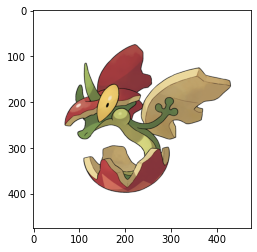

[46    Amorphous
Name: egg_type_1, dtype: object, 46    Mineral
Name: egg_type_2, dtype: object]
[('Grass', 0.6592788), ('Monster', 0.32321012)]


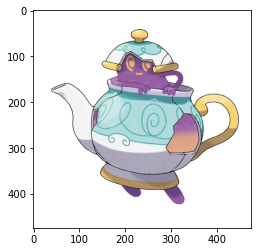

[76    Undiscovered
Name: egg_type_1, dtype: object, 76    NaN
Name: egg_type_2, dtype: object]
[('Amorphous', 0.61079407), ('Flying', 0.20825896)]


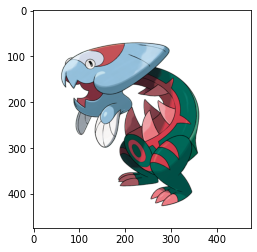

[74    Undiscovered
Name: egg_type_1, dtype: object, 74    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.9885357), ('Water', 0.008699039)]


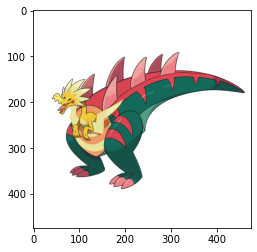

[33    Dragon
Name: egg_type_1, dtype: object, 33    Field
Name: egg_type_2, dtype: object]
[('Amorphous', 0.61424196), ('Dragon', 0.1958745)]


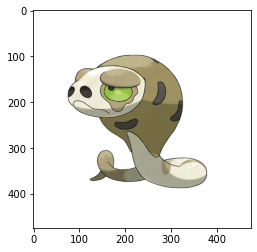

[48    Fairy
Name: egg_type_1, dtype: object, 48    NaN
Name: egg_type_2, dtype: object]
[('Fairy', 0.81725526), ('Field', 0.18049917)]


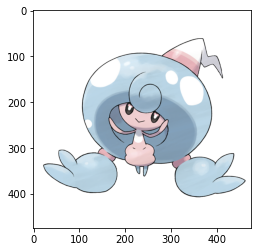

[47    Fairy
Name: egg_type_1, dtype: object, 47    NaN
Name: egg_type_2, dtype: object]
[('Monster', 0.8972046), ('Water', 0.07036895)]


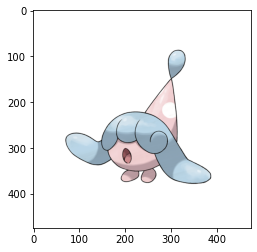

[32    Dragon
Name: egg_type_1, dtype: object, 32    Grass
Name: egg_type_2, dtype: object]
[('Field', 0.77122533), ('Bug', 0.20290886)]


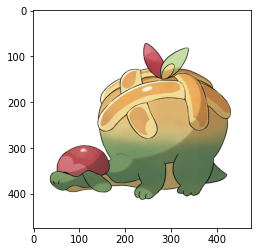

[75    Undiscovered
Name: egg_type_1, dtype: object, 75    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.99427783), ('Fairy', 0.0056972504)]


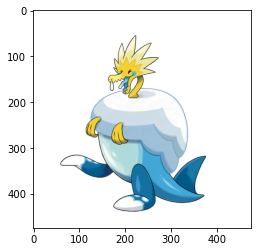

[79    Amorphous
Name: egg_type_1, dtype: object, 79    Dragon
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.5631682), ('Grass', 0.20896807)]


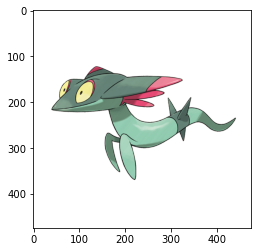

[36    Water 2
Name: egg_type_1, dtype: object, 36    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.7996182), ('Water', 0.16946314)]


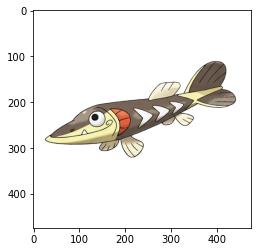

[43    Human-Like
Name: egg_type_1, dtype: object, 43    Water 1
Name: egg_type_2, dtype: object]
[('Flying', 0.2815488), ('Field', 0.24951865)]


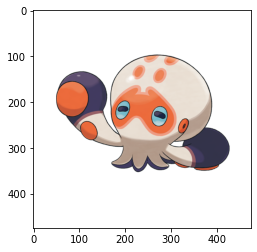

[44    Human-Like
Name: egg_type_1, dtype: object, 44    Water 1
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.9931451), ('Field', 0.006079792)]


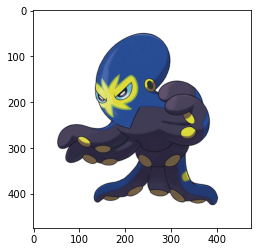

[37    Water 2
Name: egg_type_1, dtype: object, 37    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.63901395), ('Water', 0.21974371)]


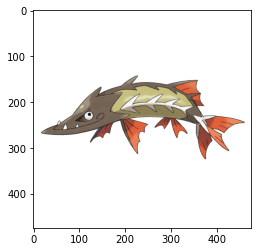

[86    Undiscovered
Name: egg_type_1, dtype: object, 86    NaN
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.9986324), ('Bug', 0.0013676116)]


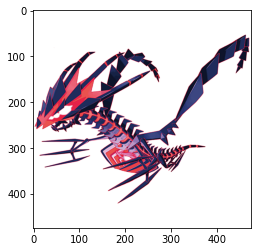

[78    Dragon
Name: egg_type_1, dtype: object, 78    Mineral
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.5797788), ('Mineral', 0.2959484)]


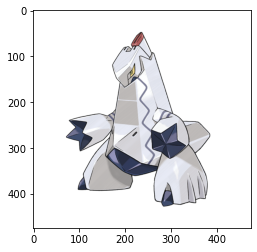

[80    Amorphous
Name: egg_type_1, dtype: object, 80    Dragon
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.69569826), ('Bug', 0.18775919)]


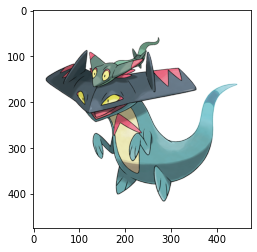

[73    Field
Name: egg_type_1, dtype: object, 73    Mineral
Name: egg_type_2, dtype: object]
[('Field', 0.8193), ('Mineral', 0.12679265)]


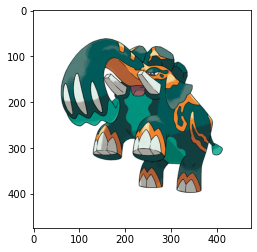

[42    Bug
Name: egg_type_1, dtype: object, 42    NaN
Name: egg_type_2, dtype: object]
[('Dragon', 0.85324097), ('Field', 0.12520139)]


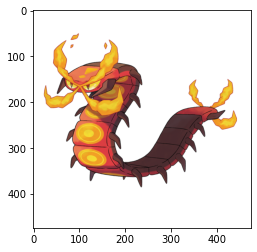

[35    Flying
Name: egg_type_1, dtype: object, 35    Water 1
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.3923223), ('Flying', 0.39173535)]


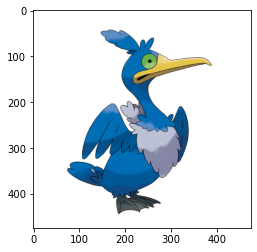

[34    Dragon
Name: egg_type_1, dtype: object, 34    Field
Name: egg_type_2, dtype: object]
[('Field', 0.41748983), ('Undiscovered', 0.295266)]


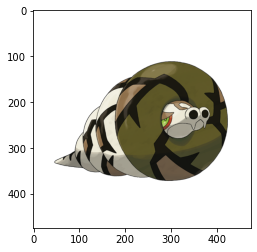

[41    Bug
Name: egg_type_1, dtype: object, 41    NaN
Name: egg_type_2, dtype: object]
[('Water', 0.32066658), ('Field', 0.25982335)]


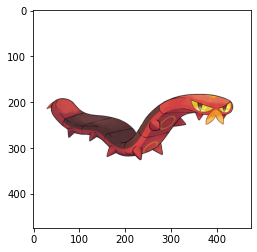

[72    Field
Name: egg_type_1, dtype: object, 72    Mineral
Name: egg_type_2, dtype: object]
[('Fairy', 0.88940495), ('Water', 0.092760615)]


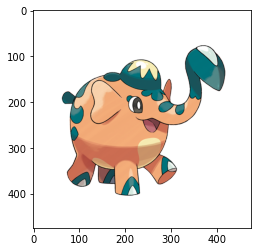

[81    Amorphous
Name: egg_type_1, dtype: object, 81    Dragon
Name: egg_type_2, dtype: object]
[('Bug', 0.6762748), ('Water', 0.14255713)]


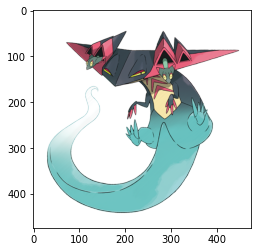

[66    Field
Name: egg_type_1, dtype: object, 66    Water 1
Name: egg_type_2, dtype: object]
[('Mineral', 0.99955124), ('Amorphous', 0.00042461033)]


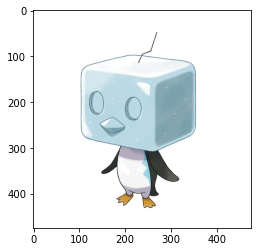

[52    Fairy
Name: egg_type_1, dtype: object, 52    Human-Like
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.9996822), ('Mineral', 0.0001262606)]


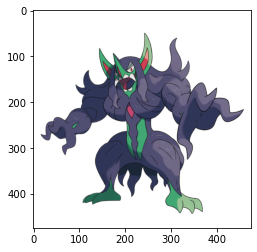

[39    Human-Like
Name: egg_type_1, dtype: object, 39    NaN
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.8590586), ('Grass', 0.043479454)]


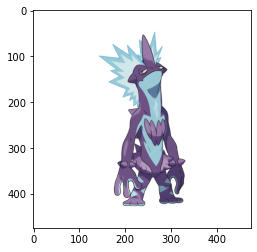

[38    Undiscovered
Name: egg_type_1, dtype: object, 38    NaN
Name: egg_type_2, dtype: object]
[('Mineral', 0.6678323), ('Field', 0.2525283)]


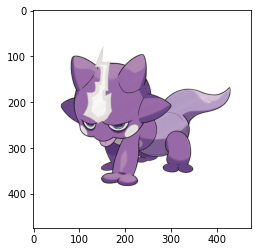

[51    Fairy
Name: egg_type_1, dtype: object, 51    Human-Like
Name: egg_type_2, dtype: object]
[('Field', 0.9628633), ('Mineral', 0.020364765)]


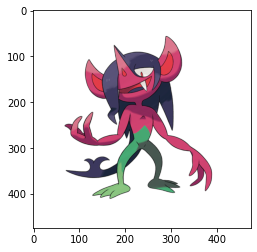

[65    Mineral
Name: egg_type_1, dtype: object, 65    NaN
Name: egg_type_2, dtype: object]
[('Mineral', 0.999998), ('Monster', 1.3381027e-06)]


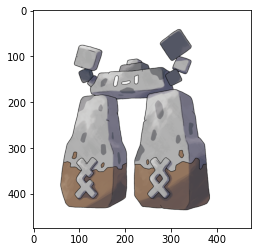

[84    Undiscovered
Name: egg_type_1, dtype: object, 84    NaN
Name: egg_type_2, dtype: object]
[('Water', 0.8894688), ('Field', 0.062114827)]


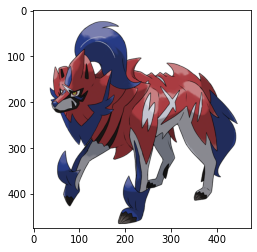

[53    Field
Name: egg_type_1, dtype: object, 53    NaN
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.6496314), ('Field', 0.30707023)]


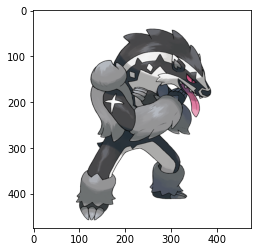

[68    Fairy
Name: egg_type_1, dtype: object, 68    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.7261151), ('Undiscovered', 0.23025548)]


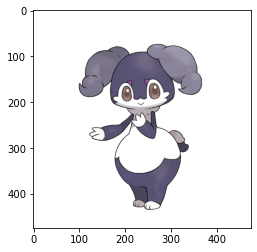

[70    Fairy
Name: egg_type_1, dtype: object, 70    Field
Name: egg_type_2, dtype: object]
[('Fairy', 0.99880064), ('Field', 0.0008687247)]


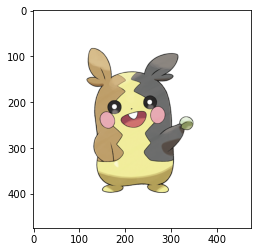

[54    Field
Name: egg_type_1, dtype: object, 54    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.9919045), ('Bug', 0.005874735)]


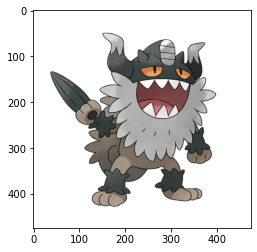

[82    Undiscovered
Name: egg_type_1, dtype: object, 82    NaN
Name: egg_type_2, dtype: object]
[('Water', 0.9999969), ('Bug', 3.0311892e-06)]


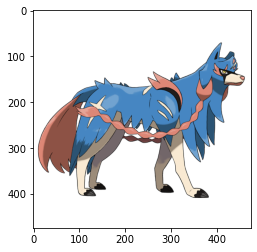

[58    Amorphous
Name: egg_type_1, dtype: object, 58    Mineral
Name: egg_type_2, dtype: object]
[('Amorphous', 0.9998068), ('Field', 0.00017178363)]


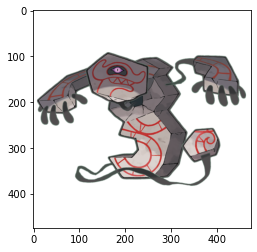

[64    Bug
Name: egg_type_1, dtype: object, 64    NaN
Name: egg_type_2, dtype: object]
[('Water', 0.4747388), ('Field', 0.44685754)]


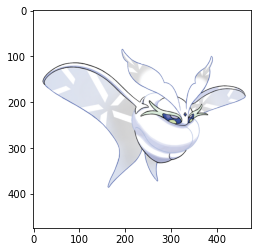

[63    Bug
Name: egg_type_1, dtype: object, 63    NaN
Name: egg_type_2, dtype: object]
[('Mineral', 0.9989343), ('Undiscovered', 0.00059674465)]


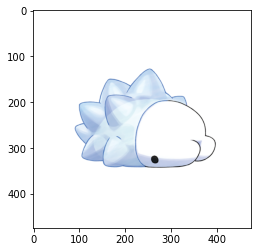

[57    Human-Like
Name: egg_type_1, dtype: object, 57    NaN
Name: egg_type_2, dtype: object]
[('Human-Like', 0.906578), ('Field', 0.06579346)]


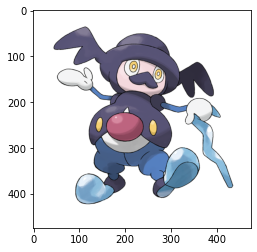

[49    Fairy
Name: egg_type_1, dtype: object, 49    NaN
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.9903723), ('Field', 0.00707446)]


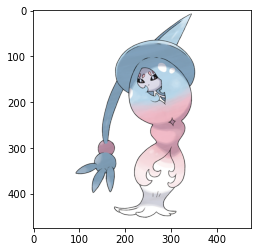

[61    Fairy
Name: egg_type_1, dtype: object, 61    Mineral
Name: egg_type_2, dtype: object]
[('Field', 0.8332131), ('Water', 0.08523875)]


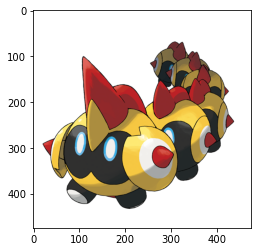

[55    Water 1
Name: egg_type_1, dtype: object, 55    Water 3
Name: egg_type_2, dtype: object]
[('Amorphous', 0.56291616), ('Field', 0.21464542)]


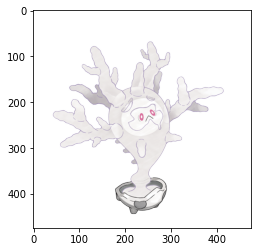

[56    Field
Name: egg_type_1, dtype: object, 56    Flying
Name: egg_type_2, dtype: object]
[('Amorphous', 0.88214815), ('Field', 0.044085126)]


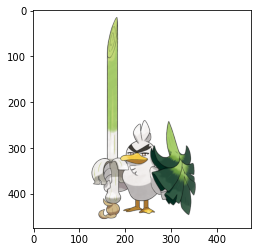

[62    Amorphous
Name: egg_type_1, dtype: object, 62    Water 1
Name: egg_type_2, dtype: object]
[('Field', 0.9674693), ('Undiscovered', 0.015988702)]


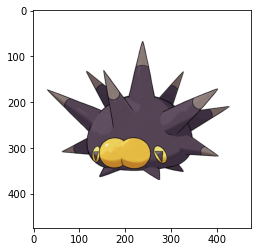

[50    Fairy
Name: egg_type_1, dtype: object, 50    Human-Like
Name: egg_type_2, dtype: object]
[('Field', 0.854516), ('Bug', 0.12552077)]


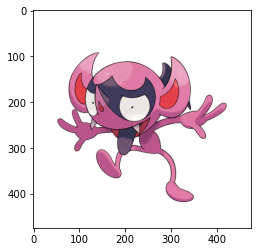

[6    Field
Name: egg_type_1, dtype: object, 6    Water 1
Name: egg_type_2, dtype: object]
[('Field', 0.49460644), ('Water', 0.45146707)]


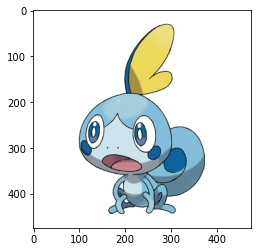

[7    Field
Name: egg_type_1, dtype: object, 7    Water 1
Name: egg_type_2, dtype: object]
[('Monster', 0.83735657), ('Field', 0.095247984)]


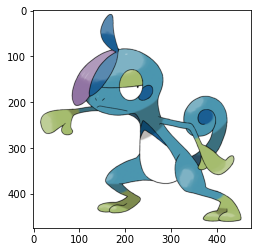

[5    Field
Name: egg_type_1, dtype: object, 5    Human-Like
Name: egg_type_2, dtype: object]
[('Field', 0.4844505), ('Undiscovered', 0.2894222)]


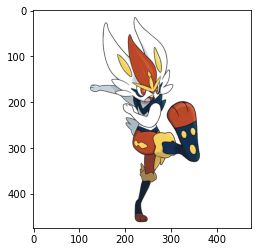

[19    Grass
Name: egg_type_1, dtype: object, 19    NaN
Name: egg_type_2, dtype: object]
[('Bug', 0.69017804), ('Fairy', 0.15600412)]


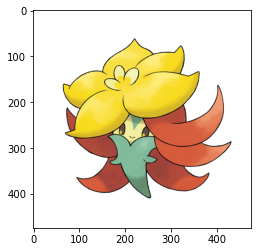

[18    Field
Name: egg_type_1, dtype: object, 18    NaN
Name: egg_type_2, dtype: object]
[('Field', 0.99999714), ('Bug', 1.2063578e-06)]


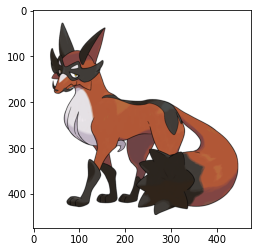

[4    Field
Name: egg_type_1, dtype: object, 4    Human-Like
Name: egg_type_2, dtype: object]
[('Field', 0.8389246), ('Amorphous', 0.090658434)]


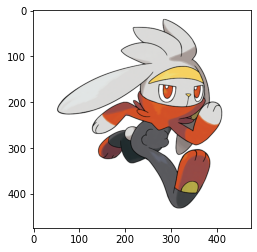

[28    Mineral
Name: egg_type_1, dtype: object, 28    NaN
Name: egg_type_2, dtype: object]
[('Mineral', 0.9999993), ('Grass', 5.475066e-07)]


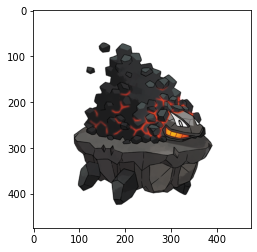

[0    Field
Name: egg_type_1, dtype: object, 0    Grass
Name: egg_type_2, dtype: object]
[('Field', 0.9761258), ('Bug', 0.019457042)]


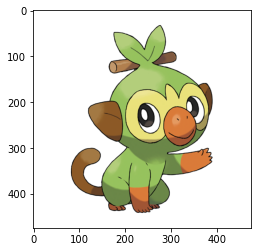

[1    Field
Name: egg_type_1, dtype: object, 1    Grass
Name: egg_type_2, dtype: object]
[('Field', 0.67636734), ('Monster', 0.27956048)]


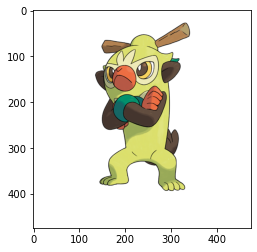

[29    Mineral
Name: egg_type_1, dtype: object, 29    NaN
Name: egg_type_2, dtype: object]
[('Undiscovered', 0.99943584), ('Mineral', 0.000527616)]


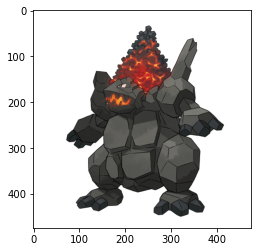

[3    Field
Name: egg_type_1, dtype: object, 3    Human-Like
Name: egg_type_2, dtype: object]
[('Field', 0.9977888), ('Human-Like', 0.0020628173)]


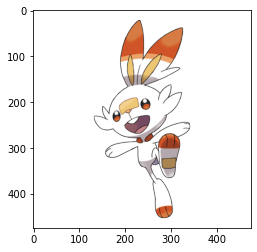

[2    Field
Name: egg_type_1, dtype: object, 2    Grass
Name: egg_type_2, dtype: object]
[('Field', 0.62494737), ('Grass', 0.29240555)]


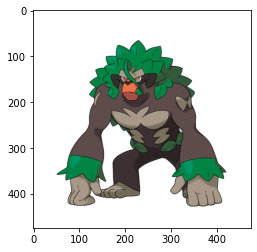

In [10]:
# モデルのロード
model = model_load()

# テスト用画像取得
test_imagelist = os.listdir(test_data_dir)
# .DS_Storeの削除
test_imagelist = [filename for filename in listdir(test_data_dir) if not filename.startswith('.')]

%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
 
fig = plt.figure(figsize=(10, 10)) # 10 x 10の画像表示域を確保

correct_answer = 0
count = 0

for test_image in test_imagelist:
    filename = os.path.join(test_data_dir, test_image)
    
    image_name = filename.split('/')[3]
    pokedex_number = image_name.split('.')[0]
    pokedex_number = int(pokedex_number)
    
    img = image.load_img(filename, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # 学習時に正規化してるので、ここでも正規化
    x = x / 255
    pred = model.predict(x)[0]
    
    # 予測確率が高いトップを出力
    # 今回は最も似ているクラスのみ出力したいので1にしているが、上位n個を表示させることも可能。
    top = 2
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    egg_type1 = pokedex3.loc[pokedex3['pokedex_number'] == pokedex_number]['egg_type_1']
    egg_type2 = pokedex3.loc[pokedex3['pokedex_number'] == pokedex_number]['egg_type_2']
    answers = [egg_type1, egg_type2]
    print(answers)
#     for prediction in result:
#         for answer in answers:
#             if prediction[0] in answer:
#                 correct_answer += 1
#                 break
#     count += 1
    
    im = Image.open(filename)
    #画像をarrayに変換
    im_list = np.asarray(im)
    #貼り付け
    plt.imshow(im_list)
    print(result)
    #表示
    plt.show()
    
    print('=======================================')

In [11]:
accuracy_rate = (46/81)*100

In [12]:
accuracy_rate

56.79012345679012